# Educ - MNIST Beispiel (input im Kurs)

In [3]:
!pip install watson-machine-learning-client

In [1]:
import keras
from keras.datasets import mnist

In [4]:
(X_train, y_train_classes), (X_test, y_test_classes) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
import numpy as np
np.unique(y_train_classes)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
y_train_classes[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')

In [12]:
X_train[1,:,:,0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [13]:
X_train /= 255
X_test /= 255

In [15]:
digit = 7
idx = np.where(y_train_classes == digit)[0]

In [ ]:
from matplotlib import pylab as plt

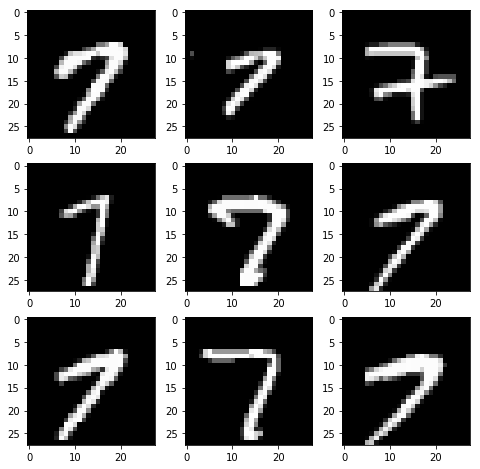

In [18]:
plt.figure(figsize=(8,8))
for p, i in enumerate(idx[:9]):
    plt.subplot(3,3,p+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray', interpolation=None)

In [19]:
X_train[1].reshape(28,28)  

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
from keras.utils import to_categorical

In [24]:
# On Hot Encoding - each digit is in array placed once - for ml needed
y_train = to_categorical(y_train_classes)
y_test = to_categorical(y_test_classes)

In [25]:
y_train[0], y_train_classes[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), 5)

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [32]:
model = Sequential()

# 64 Filter mit der größe 3,3 
model.add ( Conv2D(64, (3, 3), activation='relu', input_shape = (28, 28, 1)) )
# --> 64 Bilder mit 26,26 

# nächster Schritt - ein Detektor von 64 gibt nur mehr das Maximum von 4 Pixeln (2 + 2) zurück 
model.add ( MaxPooling2D(pool_size=(2, 2)) )
# --> Bilder werden auf 13,13 

# 50% der gewichte werden in den neuronen auf 0 gesetzt
model.add ( Dropout(rate=0.5) )

# generalisieren auf einen Vektor 64*13*13
model.add ( Flatten())

model.add( Dense (128, activation='relu') )

model.add( Dropout( rate= 0.5))

# Vektor in einen Wahrscheinlichkeitsvektor umrechnen -- macht die Funktion softmax
model.add( Dense (10, activation='softmax') )

model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

In [35]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

In [37]:
model.compile(
    loss = categorical_crossentropy,
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [39]:
# Verwenden der ersten 50000 fürs Trainieren und den rest fürs validieren
model.fit(
    X_train[:50000], y_train[:50000],
    batch_size = 128,
    epochs=2,
    verbose=1,
    validation_data=(X_train[50000:], y_train[50000:])
)

Train on 10000 samples, validate on 10000 samples
Epoch 1/2
10000/10000 [==============================] - 35s 3ms/step - loss: 0.3600 - acc: 0.8960 - val_loss: 0.1871 - val_acc: 0.9432
Epoch 2/2
10000/10000 [==============================] - 34s 3ms/step - loss: 0.2329 - acc: 0.9323 - val_loss: 0.1387 - val_acc: 0.9597


In [40]:
# Test des models gegen die Testdaten
score = model.evaluate(X_test, y_test, verbose = 0)

In [41]:
loss_test = score[0]
loss_test

0.1387343276321888

In [42]:
acc_test = score[1]
acc_test

0.9597

In [45]:
# First, the Keras model has to be stored in HDF-5 file
model_file_name = 'keras_mnist_cnn.h5'
model.save (model_file_name)

# Save the Keras model as a package
import os
model_development_artifact_name = model_file_name.replace('.h5', '.tgz')
os.system("tar cvzf {} {}".format(model_development_artifact_name, model_file_name))

!ls -alh

total 31M
drwxr-x--- 2 dsxuser dsxuser 4.0K Jan 20 08:23 .
drwx------ 1 dsxuser dsxuser 4.0K Jan 20 07:30 ..
-rw-r----- 1 dsxuser dsxuser  16M Jan 20 08:23 keras_mnist_cnn.h5
-rw-r----- 1 dsxuser dsxuser  15M Jan 20 08:23 keras_mnist_cnn.tgz


In [46]:
# The code was removed by Watson Studio for sharing.

In [48]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-01-20 08:33:21,596 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2020-01-20 08:40:23,601 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [49]:
wml_client = WatsonMachineLearningAPIClient(wml_credentials)

In [50]:
import tensorflow, sys
sys.version, tensorflow.__version__, keras.__version__

('3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) \n[GCC 7.3.0]',
 '1.13.1',
 '2.2.4')

In [58]:
model_props = {
    wml_client.repository.ModelMetaNames.AUTHOR_NAME : "Olaf Hahn",
    wml_client.repository.ModelMetaNames.AUTHOR_EMAIL : "olaf.hahn@fh-hagenberg.at",
    wml_client.repository.ModelMetaNames.NAME : "Simple CNN from MNIST data",
    wml_client.repository.ModelMetaNames.FRAMEWORK_NAME: "tensorflow",
    wml_client.repository.ModelMetaNames.FRAMEWORK_VERSION : "1.13",
    wml_client.repository.ModelMetaNames.RUNTIME_NAME : "python",
    wml_client.repository.ModelMetaNames.RUNTIME_VERSION : "3.6", 
    wml_client.repository.ModelMetaNames.FRAMEWORK_LIBRARIES : [{'version' : '2.2.4', 'name' : 'keras'}]
}
model_props

{'authorName': 'Olaf Hahn',
 'author_email': 'olaf.hahn@fh-hagenberg.at',
 'name': 'Simple CNN from MNIST data',
 'frameworkName': 'tensorflow',
 'frameworkVersion': '1.13',
 'runtime_name': 'python',
 'runtime_version': '3.6',
 'frameworkLibraries': [{'version': '2.2.4', 'name': 'keras'}]}

In [59]:
published_keras_cnn = wml_client.repository.store_model(
    model = model_development_artifact_name,
    meta_props = model_props
)

In [60]:
model_guid = wml_client.repository.get_model_uid(published_keras_cnn)
model_guid

'a169455a-eb99-4493-874e-f8e973c78a4c'

In [61]:
deployment_details = wml_client.deployments.create (
    model_guid, name = 'Deployment of ' + model_props[wml_client.repository.ModelMetaNames.AUTHOR_NAME]
)



#######################################################################################

Synchronous deployment creation for uid: 'a169455a-eb99-4493-874e-f8e973c78a4c' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='8c0a9668-e1b4-44f5-abb0-689b6042f34c'
------------------------------------------------------------------------------------------------




In [62]:
scoring_url = wml_client.deployments.get_scoring_url(deployment_details)
scoring_url

'https://eu-de.ml.cloud.ibm.com/v3/wml_instances/ca8827ac-42b3-4b43-bfdc-7eafb3bf054b/deployments/8c0a9668-e1b4-44f5-abb0-689b6042f34c/online'

In [66]:
def numpy_array_to_json_serializable(array):
    return [[[float(x)] for x in row] for row in array]

In [67]:
numpy_array_to_json_serializable(X_test[0]);

In [68]:
n = 20

scoring_payload = {
    'values' : [numpy_array_to_json_serializable(X_test[i]) for i in range(n)]
}

predictions = wml_client.deployments.score(scoring_url, scoring_payload)

In [69]:
predictions['fields']

['prediction', 'prediction_classes', 'probability']

In [70]:
predictions['values'][0][1]

7

In [74]:
[predictions['values'][i][1] for i in range(n)]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

In [75]:
list(y_test_classes[:n])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]